In [122]:
import numpy as np
import os
import matplotlib.pylab as plt
import seaborn as sns
import folium
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.subplots
import plotly.figure_factory as ff
import plotly.graph_objs as go
pd.set_option('display.max_columns', None)

In [123]:
# Obtén la ruta del directorio actual
path = os.getcwd()

# Sube un nivel en la estructura de directorios para llegar a la carpeta raíz del proyecto
project_root = os.path.dirname(path)

# Construye la ruta al archivo csv
csv_path = os.path.join(project_root, 'data', 'raw', 'coaster_db.csv')

In [124]:
df = pd.read_csv(csv_path)
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [125]:
df.shape

(1087, 56)

In [126]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


In [127]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [128]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [129]:
df = df [['coaster_name', 'Location', 'Status', 'Manufacturer',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_ft',
       'Inversions_clean', 'Gforce_clean']]
df.head()

,coaster_name,Location,Status,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coaster_name        1087 non-null   object 
 1   Location            1087 non-null   object 
 2   Status              874 non-null    object 
 3   Manufacturer        1028 non-null   object 
 4   year_introduced     1087 non-null   int64  
 5   latitude            812 non-null    float64
 6   longitude           812 non-null    float64
 7   Type_Main           1087 non-null   object 
 8   opening_date_clean  837 non-null    object 
 9   speed1              937 non-null    object 
 10  speed2              935 non-null    object 
 11  speed1_value        937 non-null    float64
 12  speed1_unit         937 non-null    object 
 13  speed_mph           937 non-null    float64
 14  height_ft           171 non-null    float64
 15  Inversions_clean    1087 non-null   int64  
 16  Gforce

In [131]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'],errors='coerce')

In [132]:
df = df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

In [133]:
# Check for duplicate coaster name
df.loc[df.duplicated(subset=['Coaster_Name'])].head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed1,speed2,speed1_value,speed1_unit,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60 mph,97 km/h,60.0,mph,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50 mph,80 km/h,50.0,mph,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35 mph,56 km/h,35.0,mph,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,64 km/h,40 mph,64.0,km/h,39.8,32.8,0,NaN


In [134]:
# # Null percentage
# df.loc[:,df.isna().mean() < 0.30]

In [135]:
# sns.heatmap(df, annot=True)

In [136]:
# Checking an example duplicate
df.query('Coaster_Name == "American Dreier Looping"')

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed1,speed2,speed1_value,speed1_unit,Speed_mph,Height_ft,Inversions,Gforce
422,American Dreier Looping,Other,NaN,Anton Schwarzkopf,1997,NaN,NaN,Steel,NaT,53 mph,85 km/h,53.0,mph,53.0,NaN,3,4.7
686,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2005,NaN,NaN,Steel,NaT,53 mph,85 km/h,53.0,mph,53.0,NaN,3,4.7
738,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2007,NaN,NaN,Steel,NaT,53 mph,85 km/h,53.0,mph,53.0,NaN,3,4.7
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53 mph,85 km/h,53.0,mph,53.0,NaN,3,4.7


In [137]:
df_procesed = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])].reset_index(drop=True).copy()

In [138]:
df_procesed.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed1,speed2,speed1_value,speed1_unit,Speed_mph,Height_ft,Inversions,Gforce
0,Switchback Railway,Coney Island,Removed,LaMarcus Adna Thompson,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,Lina Beecher,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,NaN,1896,41.5800,-81.5700,Other,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),Other,Removed,Edwin Prescott,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),Other,Removed,Edwin Prescott,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [139]:
path = os.getcwd()

project_root = os.path.dirname(path)

csv_path = os.path.join(project_root, 'data', 'processed', 'data_procesed.csv')
df_procesed.to_csv(csv_path, index=False)

<Axes: xlabel='Speed_mph', ylabel='Height_ft'>

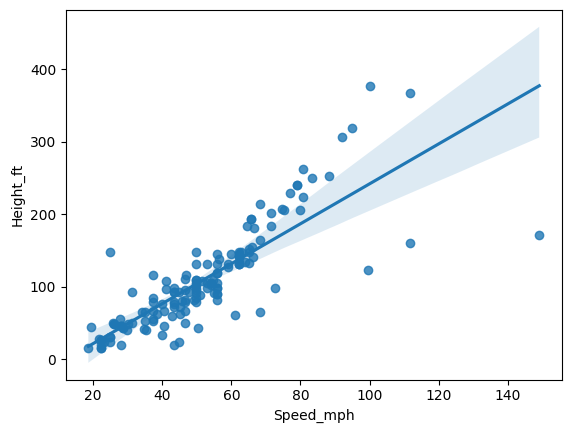

In [140]:
sns.regplot(x=df_procesed['Speed_mph'], y=df_procesed['Height_ft'])

In [141]:
df_procesed.isna().sum().sum()

2999

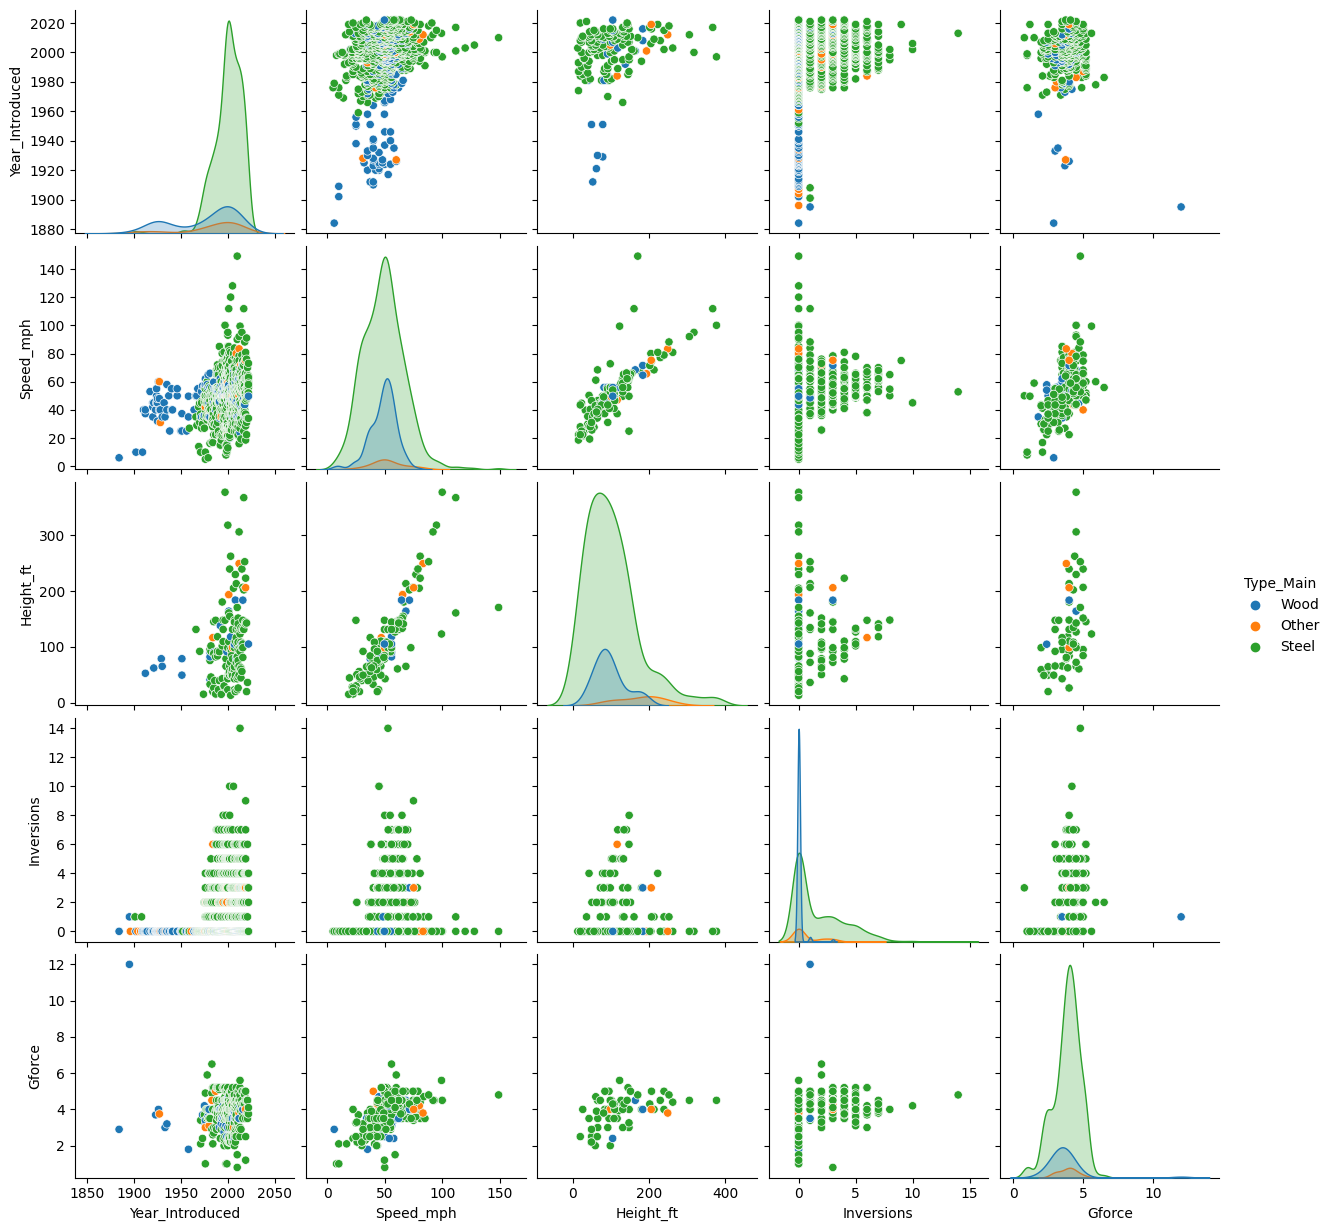

In [142]:
sns.pairplot(df_procesed,
             vars=['Year_Introduced','Speed_mph',
                   'Height_ft','Inversions','Gforce'],
            hue='Type_Main')
plt.show()

In [143]:
df_procesed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Coaster_Name     990 non-null    object        
 1   Location         990 non-null    object        
 2   Status           844 non-null    object        
 3   Manufacturer     932 non-null    object        
 4   Year_Introduced  990 non-null    int64         
 5   latitude         783 non-null    float64       
 6   longitude        783 non-null    float64       
 7   Type_Main        990 non-null    object        
 8   Opening_Date     807 non-null    datetime64[ns]
 9   speed1           850 non-null    object        
 10  speed2           849 non-null    object        
 11  speed1_value     850 non-null    float64       
 12  speed1_unit      850 non-null    object        
 13  Speed_mph        850 non-null    float64       
 14  Height_ft        159 non-null    float64  

In [144]:
df_procesed['Type_Main'].unique()

array(['Wood', 'Other', 'Steel'], dtype=object)

In [145]:
df_corr = df[['Year_Introduced','Speed_mph','Height_ft','Inversions','Gforce']].dropna().corr()


<Axes: >

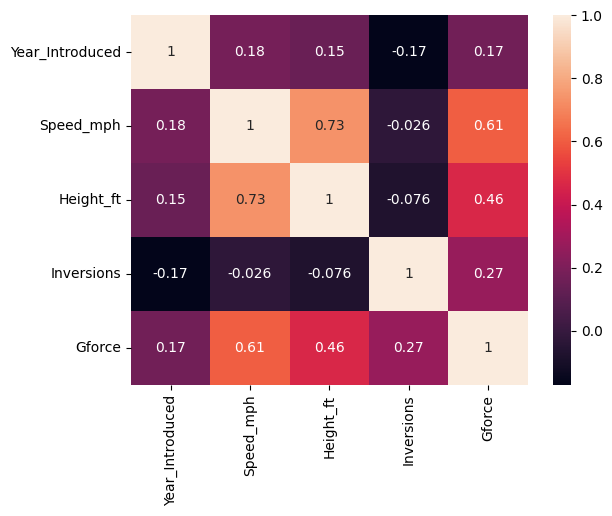

In [146]:
sns.heatmap(df_corr, annot=True)

In [147]:
df_clean = df_procesed.dropna()


In [148]:


# Crea un gráfico de densidad para la columna 'Speed_mph'
fig = ff.create_distplot([df_clean['Speed_mph']], group_labels=['Speed_mph'])

# Establece el título y las etiquetas de los ejes
fig.update_layout(title='Coaster Speed (mph)', xaxis_title='Speed (mph)')

# Muestra el gráfico
fig.show()


In [149]:


# Crea un gráfico de densidad para la columna 'Speed_mph'
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_procesed['Speed_mph'], histnorm='probability density'))

# Establece el título y las etiquetas de los ejes
fig.update_layout(title='Coaster Speed (mph)', xaxis_title='Speed (mph)')

# Muestra el gráfico
fig.show()


Text(0.5, 0, 'Speed (mph)')

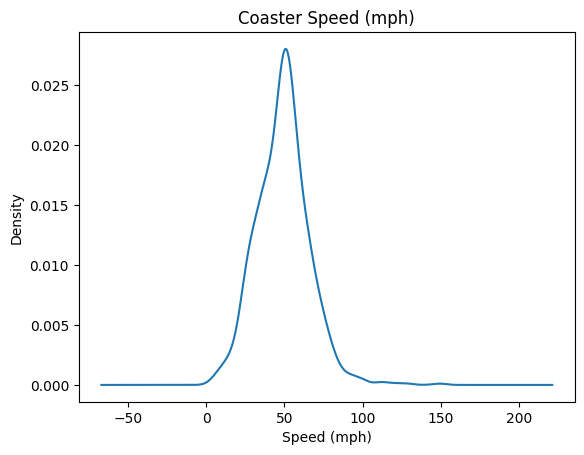

In [150]:
ax = df_procesed['Speed_mph'].plot(kind='kde',
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0, 0.5, 'Count')

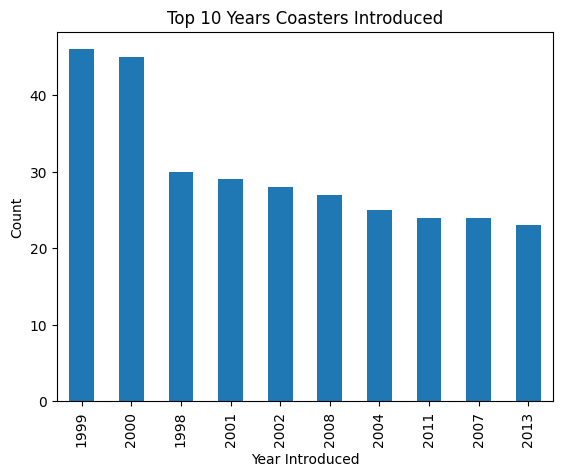

In [151]:
ax = df_procesed['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

In [152]:
num_var = df_procesed.select_dtypes(include=[np.number]).columns
num_var

Index(['Year_Introduced', 'latitude', 'longitude', 'speed1_value', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

In [153]:


# Crea una lista vacía para almacenar los gráficos de caja
box_plots = []

# Crea un gráfico de caja para cada columna numérica
for col in num_var:
    box_plots.append(go.Box(y=df_clean[col], name=col))

# Muestra los gráficos de caja en una cuadrícula
fig = plotly.subplots.make_subplots(rows=2, cols=4, subplot_titles=num_var)
for i, plot in enumerate(box_plots):
    row = i // 4 + 1
    col = i % 4 + 1
    fig.add_trace(plot, row=row, col=col)

fig.show()


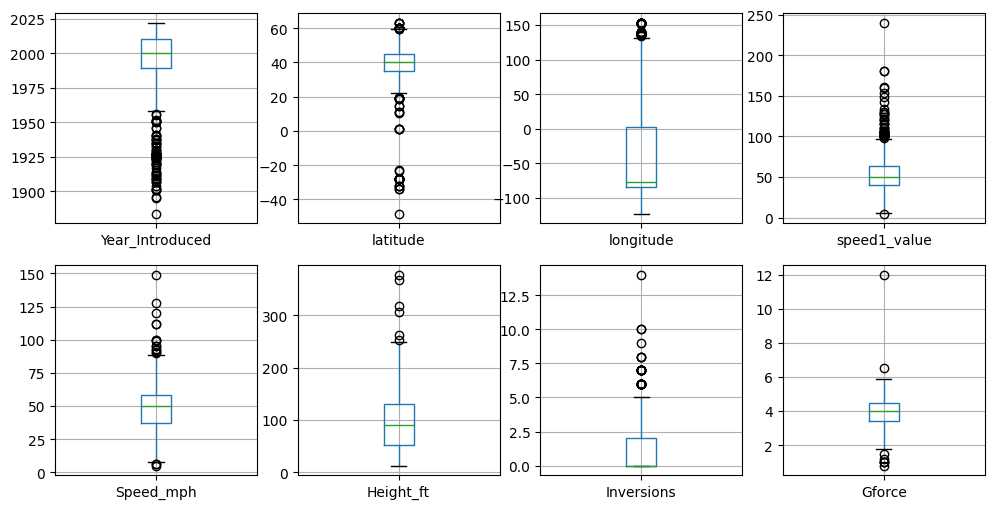

In [154]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
for i, col in enumerate(num_var):
    row = i // 4
    col_idx = i % 4
    df.boxplot(column=col, ax=axes[row, col_idx])

# Muestra el resultado
plt.show()

In [155]:
df_procesed.columns

Index(['Coaster_Name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'latitude', 'longitude', 'Type_Main', 'Opening_Date', 'speed1',
       'speed2', 'speed1_value', 'speed1_unit', 'Speed_mph', 'Height_ft',
       'Inversions', 'Gforce'],
      dtype='object')

In [156]:
import plotly.figure_factory as ff
import plotly.subplots

# Crea una lista vacía para almacenar los gráficos de violín
violin_plots = []

# Crea un gráfico de violín para cada columna numérica
for col in num_var:
    violin_plots.append(ff.create_violin(df_clean, data_header=col, group_header='Type_Main', title=col))

# Muestra los gráficos de violín en una cuadrícula
fig = plotly.subplots.make_subplots(rows=2, cols=4, subplot_titles=num_var)
for i, plot in enumerate(violin_plots):
    row = i // 4 + 1
    col = i % 4 + 1
    for trace in plot.data:
        fig.add_trace(trace, row=row, col=col)

# Ajusta el tamaño de la figura a (800, 600)
fig.update_layout(width=800, height=600)

fig.show()


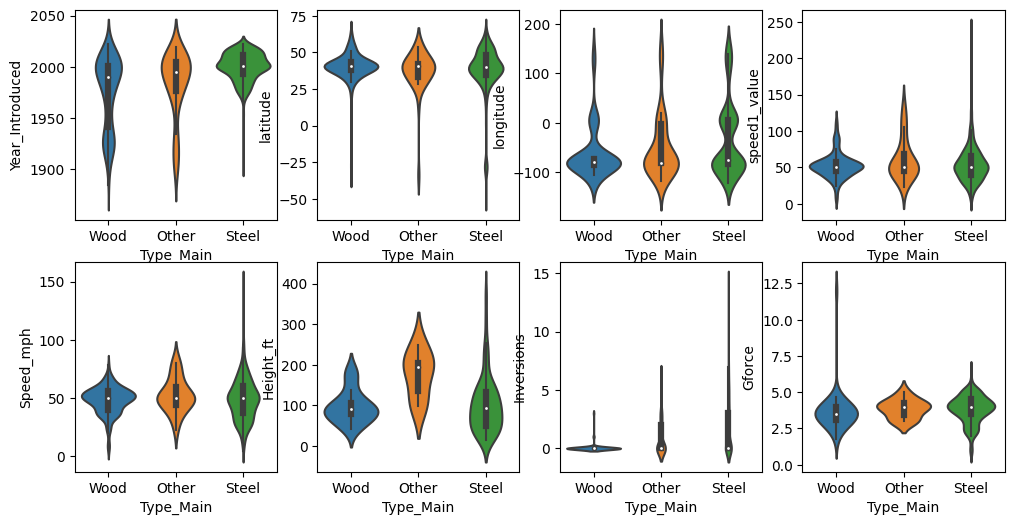

In [157]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))

for i, col in enumerate(num_var):
    row = i // 4
    col_idx = i % 4
    sns.violinplot(x='Type_Main', y=col, data=df_procesed, ax=axes[row, col_idx])

# Muestra el resultado
plt.show()

In [163]:
df_clean.head()

,Coaster_Name,Location,Status,Manufacturer,Year_Introduced,latitude,longitude,Type_Main,Opening_Date,speed1,speed2,speed1_value,speed1_unit,Speed_mph,Height_ft,Inversions,Gforce
183,Python (Efteling),Efteling,Operating,Vekoma,1981,51.6469,5.0536,Steel,1981-04-12,75 km/h,47 mph,75.0,km/h,46.6,95.1,4,3.5
225,Mindbender (Galaxyland),Galaxyland,closed for maintenance as of july 30 no reopen...,Anton Schwarzkopf,1985,53.5236,-113.6203,Steel,1985-12-20,96.5 km/h,60.0 mph,96.5,km/h,60.0,145.0,3,5.2
247,Lisebergbanan,Liseberg,Operating,Zierer,1987,57.6950,11.9925,Steel,1987-04-18,80 km/h,50 mph,80.0,km/h,49.7,147.6,0,3.0
275,Goudurix,Parc Astérix,Operating,Vekoma,1989,49.1314,2.5714,Steel,1989-01-01,90 km/h,56 mph,90.0,km/h,55.9,118.1,7,3.9
350,Condor (roller coaster),Walibi Holland,Operating,Vekoma,1994,52.4404,5.7615,Steel,1994-05-01,80 km/h,50 mph,80.0,km/h,49.7,101.7,5,4.5


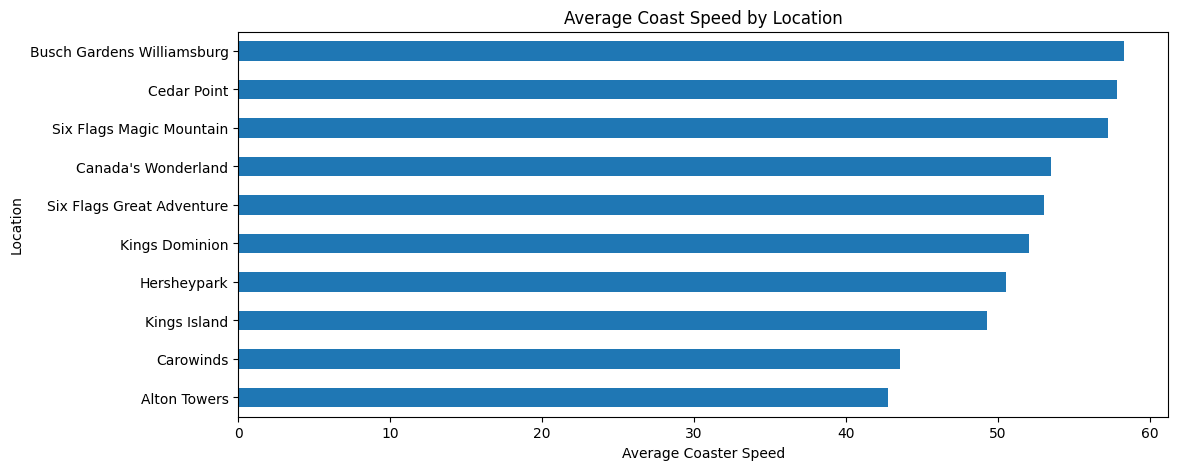

In [159]:
ax = df_procesed.query('Location != "Other"').groupby('Location')['Speed_mph'].agg(['mean','count']).query('count >= 10').sort_values('mean')['mean'].plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()

In [160]:
# Elimina las filas con valores NaN
df_clean = df.dropna()

# Selecciona los valores únicos de la columna 'Type_Main'
unique_values = df_clean['Coaster_Name'].unique()

filtered_df = df_clean[df_clean['Coaster_Name'].isin(unique_values)]

# Selecciona solo las columnas 'Coaster_Name', 'Longitud' y 'Latitud'
df_folium = filtered_df[['Coaster_Name', 'latitude', 'longitude']]


In [161]:
df_folium.isna().sum()

Coaster_Name    0
latitude        0
longitude       0
dtype: int64

In [162]:
m = folium.Map(location=[df_folium['latitude'].iloc[0], df_folium['longitude'].iloc[0]],zoom_start=2)

# Agrega un marcador al mapa para cada montaña rusa en la lista de valores únicos
for index, row in df_folium.iterrows():
    icon = folium.Icon(color='red', icon_size=(20, 20))
    folium.Marker(location=[row['latitude'], row['longitude']], icon=icon).add_to(m)

m
